#### Syed Muhammad Maisam

#### 1: Data Preprocessing and Analysis:

##### 1.1: Loading and Understanding the Dataset: 

In [1]:
# Importing necessary libraries for dataframe and visualization
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style 
style.use('ggplot')

# Importing necessary libraries for text processing
import re
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from wordcloud import WordCloud

In [2]:
# Reading the csv file as a dataframe
imdb_data = pd.read_csv("C:\\Users\\Maisam\\Downloads\\CE 887-7 ; NLP ; Assignment 2\\IMDB Dataset.csv")

In [3]:
imdb_data.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [4]:
imdb_data.shape

(50000, 2)

In [5]:
# Understanding the distribution of the dataset
imdb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [6]:
imdb_data["sentiment"].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

Text(0.5, 1.0, 'Sentiment Distribution')

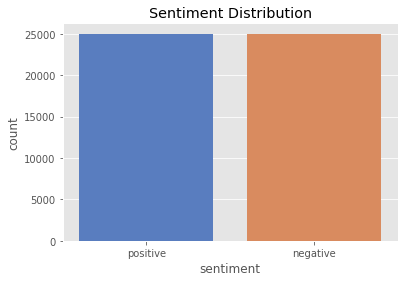

In [7]:
# Visualizing the distribution of column "sentiment" in our dataset
sns.countplot(x = 'sentiment', data= imdb_data, palette= "muted")
plt.title("Sentiment Distribution")

##### 1.2: Understanding and Breaking Up Individual Reviews:

In [8]:
# Example of reviews, length and sentiment
for i in range(5):
    print("Review Example: ", [i])
    print(imdb_data['review'].iloc[i], "\n")
    print("Sentiment: ", imdb_data['sentiment'].iloc[i], "\n\n")

Review Example:  [0]
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the s

In [9]:
# Gauging the length of reviews and its distribution
def no_of_words(review):
    words = review.split()
    word_count = len(words)
    return word_count

In [10]:
# Adding a new column "word_count" in our original dataset
imdb_data['word_count'] = imdb_data['review'].apply(no_of_words)

In [11]:
imdb_data.head(10)

,review,sentiment,word_count
0,One of the other reviewers has mentioned that ...,positive,307
1,A wonderful little production. <br /><br />The...,positive,162
2,I thought this was a wonderful way to spend ti...,positive,166
3,Basically there's a family where a little boy ...,negative,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230
5,"Probably my all-time favorite movie, a story o...",positive,119
6,I sure would like to see a resurrection of a u...,positive,150
7,"This show was an amazing, fresh & innovative i...",negative,174
8,Encouraged by the positive comments about this...,negative,130
9,If you like original gut wrenching laughter yo...,positive,33


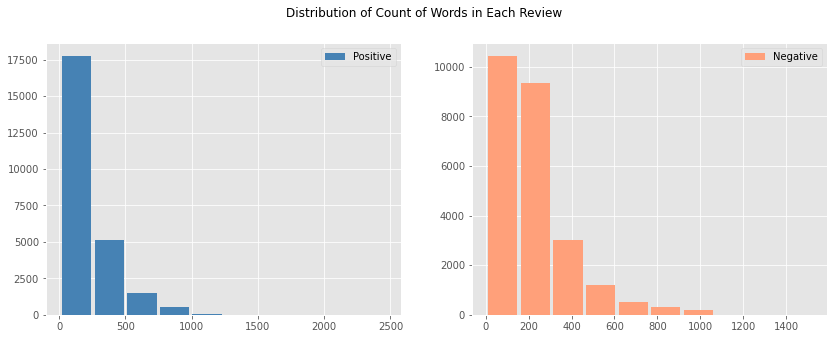

In [12]:
# Visualizing the distribution of words in both positive and negative reviews
fig, ax = plt.subplots(1,2, figsize=(14,5))

ax[0].hist(imdb_data[imdb_data['sentiment'] == 'positive']['word_count'], label='Positive', color='steelblue', rwidth = 0.9);
ax[0].legend(loc='upper right');

ax[1].hist(imdb_data[imdb_data['sentiment'] == 'negative']['word_count'], label='Negative', color='lightsalmon', rwidth = 0.9);
ax[1].legend(loc='upper right');

fig.suptitle("Distribution of Count of Words in Each Review")

plt.show()

In [13]:
# Editing our class label "sentiment" as a numerical value
imdb_data.sentiment.replace("positive", 1, inplace=True)
imdb_data.sentiment.replace("negative", 2, inplace=True)

In [14]:
imdb_data.head()

,review,sentiment,word_count
0,One of the other reviewers has mentioned that ...,1,307
1,A wonderful little production. <br /><br />The...,1,162
2,I thought this was a wonderful way to spend ti...,1,166
3,Basically there's a family where a little boy ...,2,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,230


##### 1.3: Text Pre-processing:

In [15]:
# Defining a function to perform basic text pre-processing: "stopwords removal" , "special character and html strip removal" ", "lower-casing", etc
def data_processing(text):
    # lower_casing the entire text sample
    text = text.lower()
    
    # removing special characters, punctuations, html strips, etc
    text = re.sub('<br />', '', text)
    text = re.sub(r"https\S+|www\S+|http\S+", '', text, flags = re.MULTILINE)
    text = re.sub(r'\@w+|\#', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    
    # removing stopwords
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    
    #returning processed data
    return " ".join(filtered_text)

In [16]:
# Applying our data processing function on our existing imdb dataset
imdb_data.review = imdb_data['review'].apply(data_processing)

In [17]:
# Checking duplicate entries and removing them
duplicated_count = imdb_data.duplicated().sum()
print("Total Duplicate Entries: ", duplicated_count)

imdb_data = imdb_data.drop_duplicates('review')

Total Duplicate Entries:  421


In [18]:
# Performing text stemming to retireve base words only
stemmer = PorterStemmer()

def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [19]:
imdb_data.review = imdb_data['review'].apply(lambda x: stemming(x))

In [20]:
# Checking our dataset, specifically solumn "reviews" and "word_count" to see how the data looks after pre-processing
imdb_data['word_count'] = imdb_data['review'].apply(no_of_words)
imdb_data.head(10)

,review,sentiment,word_count
0,one reviewers mentioned watching 1 oz episode ...,1,168
1,wonderful little production filming technique ...,1,84
2,thought wonderful way spend time hot summer we...,1,86
3,basically theres family little boy jake thinks...,2,67
4,petter matteis love time money visually stunni...,1,125
5,probably alltime favorite movie story selfless...,1,58
6,sure would like see resurrection dated seahunt...,1,76
7,show amazing fresh innovative idea 70s first a...,2,83
8,encouraged positive comments film looking forw...,2,64
9,like original gut wrenching laughter like movi...,1,17


##### 1.4: Understanding and Visualizing Transformed Dataset:

##### 1.4 (a): Positive Reviews:

In [21]:
# Filtering only positive reviews to understand the underlying sentiment
positive_reviews = imdb_data[imdb_data.sentiment == 1]
positive_reviews.head()

,review,sentiment,word_count
0,one reviewers mentioned watching 1 oz episode ...,1,168
1,wonderful little production filming technique ...,1,84
2,thought wonderful way spend time hot summer we...,1,86
4,petter matteis love time money visually stunni...,1,125
5,probably alltime favorite movie story selfless...,1,58


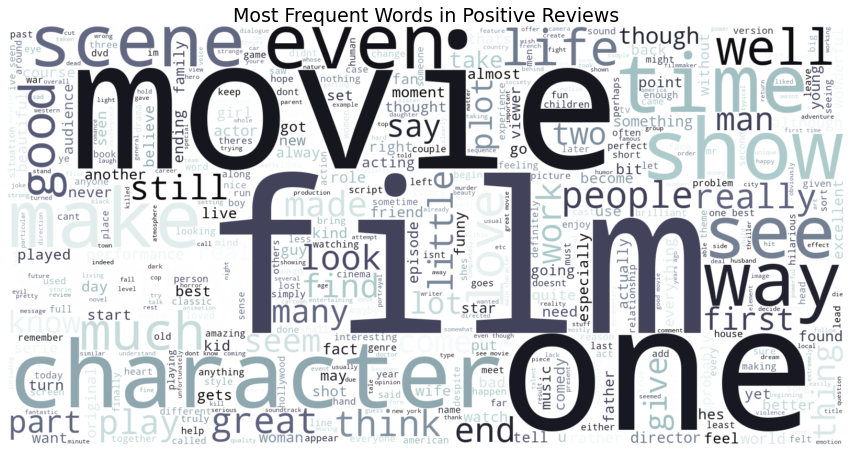

In [22]:
# Creating a word cloud for pictoral representation of positive reviews
text = ' '.join([word for word in positive_reviews['review']])

plt.figure(figsize=(15,15), facecolor='None')

wordcloud = WordCloud(max_words=500, width=1600, height=800 , background_color = '#FFFFFF' , contour_width = 2,
     contour_color = '#FFFFFF', colormap = 'bone').generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Positive Reviews', fontsize = 19 , pad = 5)
plt.show()

In [23]:
# Using "Counter" built-in function to easilt determine counts
positive_count = Counter()

for review in positive_reviews['review'].values:
    for word in review.split():
        positive_count[word] +=1

positive_count.most_common(5)

[('film', 39285),
 ('movie', 35830),
 ('one', 25621),
 ('like', 16998),
 ('good', 14281)]

In [24]:
# Visualizing the most common words in positive reviews
positive_words = pd.DataFrame(positive_count.most_common(15))
positive_words.columns = ['word', 'count']

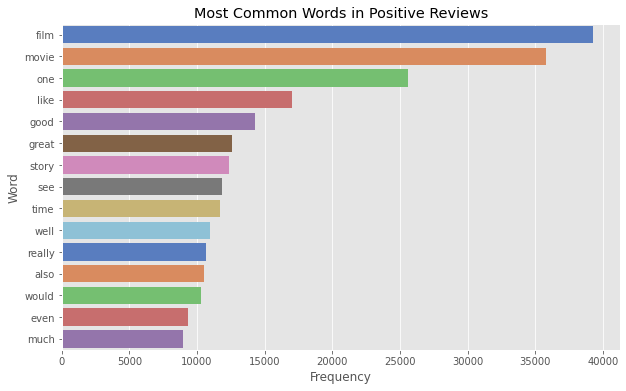

In [25]:
plt.figure(figsize=(10, 6))
sns.barplot(x= 'count', y= 'word', data = positive_words, palette= 'muted')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.title('Most Common Words in Positive Reviews')
plt.show()

##### 1.4 (b): Negative Reviews:

In [26]:
# Filtering only negative reviews to understand the underlying sentiment
negative_reviews = imdb_data[imdb_data.sentiment == 2]
negative_reviews.head()

,review,sentiment,word_count
3,basically theres family little boy jake thinks...,2,67
7,show amazing fresh innovative idea 70s first a...,2,83
8,encouraged positive comments film looking forw...,2,64
10,phil alien one quirky films humour based aroun...,2,51
11,saw movie 12 came recall scariest scene big bi...,2,84


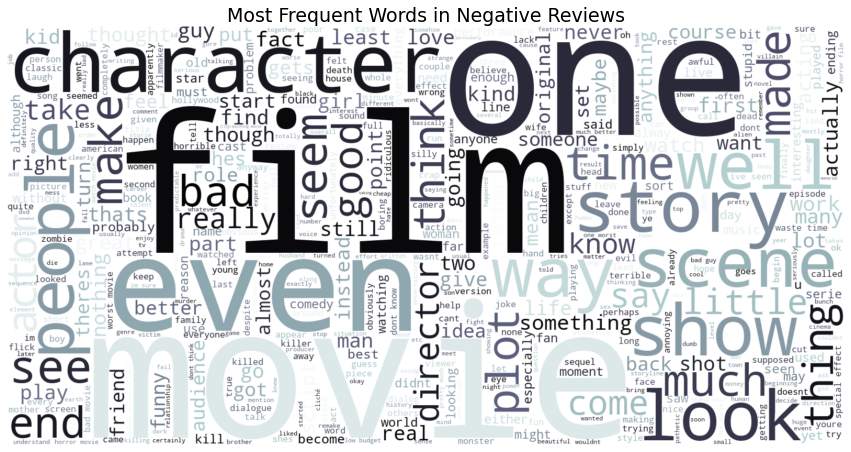

In [27]:
# Creating a word cloud for pictoral representation of negative reviews
text = ' '.join([word for word in negative_reviews['review']])

plt.figure(figsize=(15,15), facecolor='None')

wordcloud = WordCloud(max_words=500, width=1600, height=800 , background_color = '#FFFFFF' , contour_width = 2,
     contour_color = '#FFFFFF', colormap = 'bone').generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Negative Reviews', fontsize = 19 , pad = 5)
plt.show()

In [28]:
# Using "Counter" built-in function to easilt determine counts
negative_count = Counter()

for review in negative_reviews['review'].values:
    for word in review.split():
        negative_count[word] +=1

negative_count.most_common(5)

[('movie', 47001),
 ('film', 34651),
 ('one', 24361),
 ('like', 21508),
 ('even', 14759)]

In [29]:
# Visualizing the most common words in negative reviews
negative_words = pd.DataFrame(negative_count.most_common(15))
negative_words.columns = ['word', 'count']

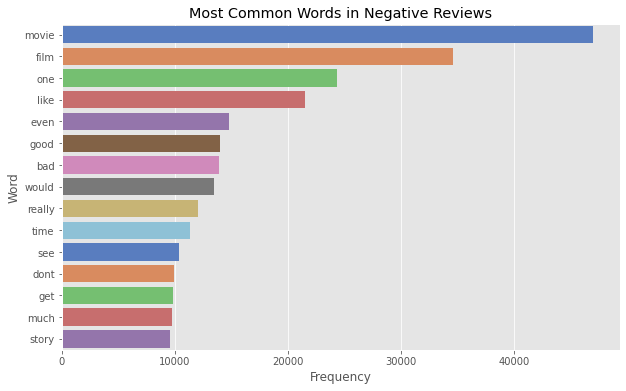

In [30]:
plt.figure(figsize=(10, 6))
sns.barplot(x= 'count', y= 'word', data = negative_words, palette= 'muted')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.title('Most Common Words in Negative Reviews')
plt.show()

#### 2: Splitting & Factorizing the Dataset:

In [31]:
# Importing necessary libraries for dataset factorization and splitting
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [32]:
imdb_data.shape

(49578, 3)

In [33]:
# We start by defining our labels
X = imdb_data['review']
Y = imdb_data['sentiment']

In [34]:
# Vectorizing the data
vect = TfidfVectorizer()
X = vect.fit_transform(imdb_data['review'])

In [35]:
# Splitting dataset into train and test
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 14)

In [36]:
# Displaying the train and test dataset size
print("Size of x_train: ", (x_train.shape))
print("Size of y_train: ", (y_train.shape))
print("Size of x_test: ", (x_test.shape))
print("Size of y_test: ", (y_test.shape))

Size of x_train:  (39662, 221707)
Size of y_train:  (39662,)
Size of x_test:  (9916, 221707)
Size of y_test:  (9916,)


#### 3: Building Text Classification Models:

In [37]:
# Importing necessary libraries to create machine learning model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

##### 3.1: Using Logistic Regression:

In [38]:
# Using logistic regression for classification on training dataset
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

# Evaluating the model on test dataset
log_reg_pred = log_reg.predict(x_test)
log_reg_acc = accuracy_score(log_reg_pred, y_test)

print("Test Accuracy: {:.2f}%".format(log_reg_acc*100))

Test Accuracy: 89.19%


In [39]:
# Creating a confusion matrix
cf_matrix_lr = confusion_matrix(y_test, log_reg_pred)
print(cf_matrix_lr)
print("\n")

# Creating a classification report
class_report_lr = classification_report(y_test, log_reg_pred)
print(class_report_lr)

[[4590  477]
 [ 595 4254]]


              precision    recall  f1-score   support

           1       0.89      0.91      0.90      5067
           2       0.90      0.88      0.89      4849

    accuracy                           0.89      9916
   macro avg       0.89      0.89      0.89      9916
weighted avg       0.89      0.89      0.89      9916



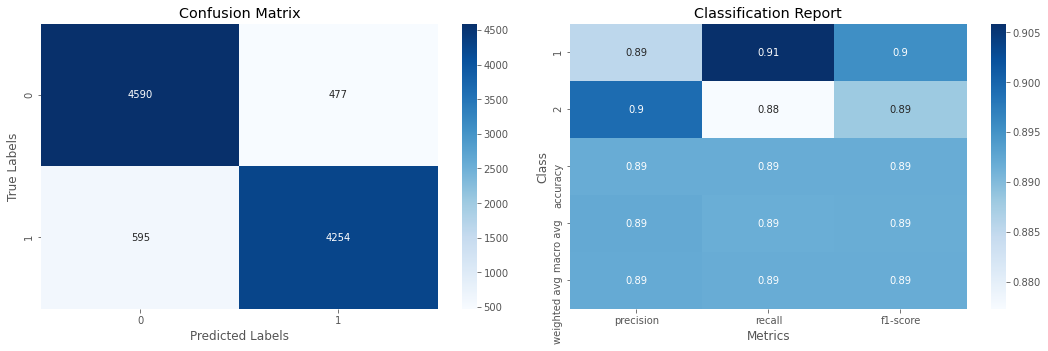

In [40]:
# Visualizing confusion matrix and classification report
plt.figure(figsize=(15, 5))

# Confusion Matrix
plt.subplot(1, 2, 1)
sns.heatmap(cf_matrix_lr, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Classification Report
plt.subplot(1, 2, 2)
class_report_dict_lr = classification_report(y_test, log_reg_pred, output_dict=True)
class_report_df_lr = pd.DataFrame(class_report_dict_lr).iloc[:-1, :].T
sns.heatmap(class_report_df_lr, annot=True, cmap='Blues', fmt='.2g')
plt.xlabel('Metrics')
plt.ylabel('Class')
plt.title('Classification Report')

plt.tight_layout()
plt.show()

##### 3.2: Using Support Vector Classifier:

In [41]:
# Using logistic regression for classification on training dataset
svc = LinearSVC()
svc.fit(x_train, y_train)


# Evaluating the model on test dataset
svc_pred = svc.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)

print("Test Accuracy: {:.2f}%".format(svc_acc*100))

Test Accuracy: 89.34%


In [42]:
# Creating a confusion matrix
cf_matrix_svc = confusion_matrix(y_test, svc_pred)
print(cf_matrix_svc)
print("\n")

# Creating a classification report
class_report_svc = classification_report(y_test, svc_pred)
print(class_report_svc)

[[4550  517]
 [ 540 4309]]


              precision    recall  f1-score   support

           1       0.89      0.90      0.90      5067
           2       0.89      0.89      0.89      4849

    accuracy                           0.89      9916
   macro avg       0.89      0.89      0.89      9916
weighted avg       0.89      0.89      0.89      9916



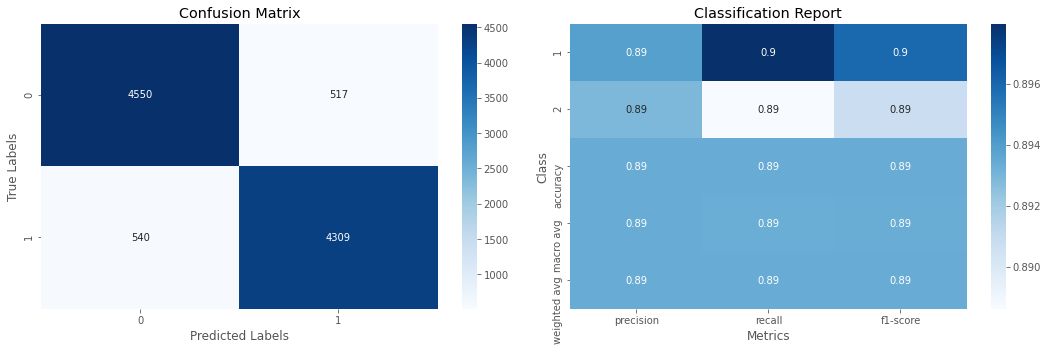

In [43]:
# Visualizing confusion matrix and classification report
plt.figure(figsize=(15, 5))

# Confusion Matrix
plt.subplot(1, 2, 1)
sns.heatmap(cf_matrix_svc, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Classification Report
plt.subplot(1, 2, 2)
class_report_dict_svc = classification_report(y_test, svc_pred, output_dict=True)
class_report_df_svc = pd.DataFrame(class_report_dict_svc).iloc[:-1, :].T
sns.heatmap(class_report_df_svc, annot=True, cmap='Blues', fmt='.2g')
plt.xlabel('Metrics')
plt.ylabel('Class')
plt.title('Classification Report')

plt.tight_layout()
plt.show()

#### 4: Creating the Best Model:

##### 4.1: Evaluating and Tuning the Model:

In [44]:
# Importing necessary libraries to perform parametric tuning
from sklearn.model_selection import GridSearchCV

In [45]:
# Performing k-folds cross validation for hyper parameter tuning
param_grid = {'C':[0.1, 1, 10, 100], 'loss':['hinge', 'squared_hinge']}
grid = GridSearchCV(svc, param_grid, refit=True, verbose = 3)
grid.fit(x_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END ..............................C=0.1, loss=hinge; total time=   0.1s
[CV 2/5] END ..............................C=0.1, loss=hinge; total time=   0.1s
[CV 3/5] END ..............................C=0.1, loss=hinge; total time=   0.1s
[CV 4/5] END ..............................C=0.1, loss=hinge; total time=   0.1s
[CV 5/5] END ..............................C=0.1, loss=hinge; total time=   0.1s
[CV 1/5] END ......................C=0.1, loss=squared_hinge; total time=   0.2s
[CV 2/5] END ......................C=0.1, loss=squared_hinge; total time=   0.2s
[CV 3/5] END ......................C=0.1, loss=squared_hinge; total time=   0.2s
[CV 4/5] END ......................C=0.1, loss=squared_hinge; total time=   0.2s
[CV 5/5] END ......................C=0.1, loss=squared_hinge; total time=   0.2s
[CV 1/5] END ................................C=1, loss=hinge; total time=   0.5s
[CV 2/5] END ................................C=1,

GridSearchCV(estimator=LinearSVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'loss': ['hinge', 'squared_hinge']},
             verbose=3)

In [46]:
print("Best Cross Validation Score: {:.2f}".format(grid.best_score_))
print("Best Parameters: ", grid.best_params_)

Best Cross Validation Score: 0.90
Best Parameters:  {'C': 1, 'loss': 'hinge'}


In [47]:
# Configuring a tuned SVC model
svc_tuned = LinearSVC(C = 1, loss='hinge')
svc_tuned.fit(x_train, y_train)

# Evaluating the model on test dataset
svc_tuned_pred = svc_tuned.predict(x_test)
svc_tuned_acc = accuracy_score(svc_tuned_pred, y_test)

print("Test Accuracy: {:.2f}%".format(svc_tuned_acc*100))

Test Accuracy: 89.72%


In [48]:
# Creating a confusion matrix
cf_matrix_svc_tuned = confusion_matrix(y_test, svc_tuned_pred)
print(cf_matrix_svc_tuned)
print("\n")

# Creating a classification report
class_report_svc_tuned = classification_report(y_test, svc_tuned_pred)
print(class_report_svc_tuned)

[[4576  491]
 [ 528 4321]]


              precision    recall  f1-score   support

           1       0.90      0.90      0.90      5067
           2       0.90      0.89      0.89      4849

    accuracy                           0.90      9916
   macro avg       0.90      0.90      0.90      9916
weighted avg       0.90      0.90      0.90      9916



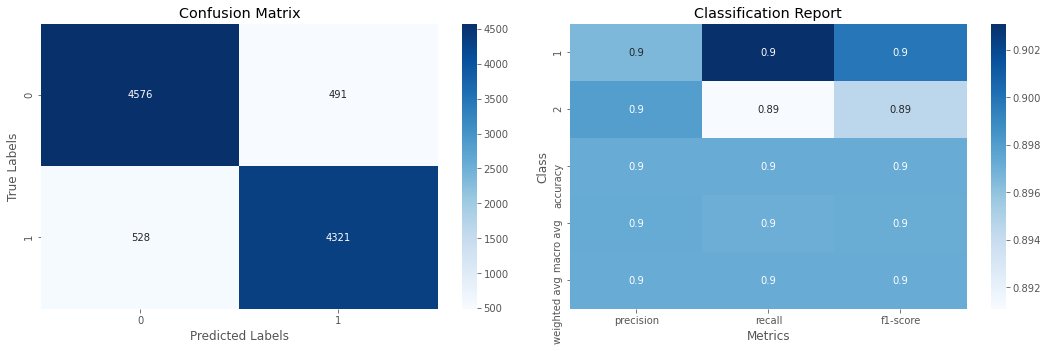

In [49]:
# Visualizing confusion matrix and classification report
plt.figure(figsize=(15, 5))

# Confusion Matrix
plt.subplot(1, 2, 1)
sns.heatmap(cf_matrix_svc_tuned, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Classification Report
plt.subplot(1, 2, 2)
class_report_dict_svc_tuned = classification_report(y_test, svc_tuned_pred, output_dict=True)
class_report_df_svc_tuned = pd.DataFrame(class_report_dict_svc_tuned).iloc[:-1, :].T
sns.heatmap(class_report_df_svc_tuned, annot=True, cmap='Blues', fmt='.2g')
plt.xlabel('Metrics')
plt.ylabel('Class')
plt.title('Classification Report')

plt.tight_layout()
plt.show()

##### 4.2: Identifying Standard Deviation in Model for Consistency:

In [50]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Running multiple times and calculating standard deviation of precision, recall, and F1 score
num_runs = 10 

precision_std = np.std([precision_score(y_test, svc_tuned_pred) for _ in range(num_runs)])
recall_std = np.std([recall_score(y_test, svc_tuned_pred) for _ in range(num_runs)])
f1_std = np.std([f1_score(y_test, svc_tuned_pred) for _ in range(num_runs)])

In [51]:
# Understanding models consistency
print("Precision Standard Deviation:", precision_std)
print("Recall Standard Deviation:", recall_std)
print("F1 Score Standard Deviation:", f1_std)

Precision Standard Deviation: 1.1102230246251565e-16
Recall Standard Deviation: 1.1102230246251565e-16
F1 Score Standard Deviation: 2.220446049250313e-16
